Author: Marc Farreras Bartra

# XY Simulation with quantum computers

## Quantum gates:

In this section the quantum gates used for the XY simulation circuit will be defined.


In [1]:
import numpy as np
from qibo.models import Circuit
from qibo import gates,models
pi=np.pi


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

---
###  XCZX:
Equivalent to a normal CZ, applying before and after a X gate to both Qbits.

$$XCZX=\begin{pmatrix}
    -1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & 1\\
    \end{pmatrix}$$

In [2]:
#XCZX:Equivalent to a normal CZ, applying before and after a X gate to both Qbits.

#Function xczx:  Creates the gate XCZX

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied

#outputs: 
        # qc --> Returns a quantum circuit of nq Qbits with the XCZX gate

def xczx(nq,q0,q1):
    #create a circuit with nq qbits
    qc=Circuit(nq)
    #add the X gate to the qbit q0
    qc.add(gates.X(q0))
    #add the X gate to the qbit q1
    qc.add(gates.X(q1))
    #add a CZ where the control qbit is q0 and the targed qbit is q1
    qc.add(gates.CZ(q0,q1))
    #add the X gate to the qbit q0
    qc.add(gates.X(q0))
    #add the X gate to the qbit q1
    qc.add(gates.X(q1))
    #return the quantum circuit with the gate xczx
    return qc



---
###  CH:
Control Haddamard. In this section it will be programmed the CH gate applied to the first or second Qbit. In matrix notation these gates are described as:

$$CH=\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
    0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\
    \end{pmatrix}\: \:\:
    CH2=\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
    0 & 0 & 1 & 0\\
    0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}\\
    \end{pmatrix}$$

In [3]:
#CH:control Haddamard in the first ans second Qbit.

#Function CH:  Creates the gate CH

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0 --> the Qbit wich controls the gate
        # q1 --> the targed Qbit

#outputs: 
        # qc --> Returns a quantum circuit of nq qbits with the CH gate
    
def ch(nq,q0,q1):
    #create a circuit with nq qubits
    qc=Circuit(nq)
    #add the conjugate adjoint of S gate to the qbit q1
    qc.add(gates.S(q1).dagger())
    #add the Hadamard gate to qbit q1
    qc.add(gates.H(q1))
    #add the conjugate adjoint T gate to qbit q1
    qc.add(gates.T(q1).dagger())
    #add the CNOT, control qubit is q0 and the target qbit is q1
    qc.add(gates.CNOT(q0,q1))
    #add the T gate to qbit q1
    qc.add(gates.T(q1))
    #add the Hadamard gate to qbit q1
    qc.add(gates.H(q1))
    #add the S gate to the qbit q1
    qc.add(gates.S(q1))
    #return the circuit with the gate CH
    return qc

---
### Fermionic SWAP:
Due to Jordan-Wigner transformation, our system is fermionic. Consequently, each time a SWAP is performed between two Qbits it is multiplied by -1 when both states are occupied  $\ket{1,1}$. However, it is important to remember that when Jordan-Wiegner is applied the state $\ket{11}$ is mapped to $\ket{\uparrow\uparrow}$. 

In order to avoid the utilization of extra gates when implementing the Jordan-Wigner transformation, the fermionic state $\ket{1}$ must be written $\ket{1}=\begin{pmatrix} 1 \\ 0 \\ \end{pmatrix}$. Hence the minus sign appears in the first element of the matrix in contraposition with the fSWAP usual form, where the minus sign appears in the last element.

$$fSWAP=\begin{pmatrix}
    -1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    \end{pmatrix}$$

In [4]:
#fSWAP:Equivalent to a normal CZ, applying before and after a X gate to both Qbits.

#Function fSWAP:  equivalent to a SWAP gate including the -1 when the states interchanged are |1,1>.

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied

#outputs: 
        # qsum --> Returns a quantum circuit of nq Qbits with the fSWAP gate

def fSWAP(nq,q0,q1):
    #create a circuit with nq qubits
    qc=Circuit(nq)
    #add the SWAP gate
    qc.add(gates.SWAP(q0,q1))
    #call the xczx function to create a second circuit which includes the XCZX gate
    qc1=xczx(nq,q0,q1)
    #sum both circuits to have one where SWAP gate is applied first and then XCZX gate
    qsum=qc+qc1
    #return the final circuit qsum
    return qsum

### Fermionic Fourier Transform:
The fermionic fourier transform is defined as: 
$$c_{j}=\frac{1}{\sqrt{N}}\sum^{\frac{n}{2}}_{k=-\frac{n}{2}+1}b_{k}e^{\
i\frac{2\pi k}{n}j}, \
\:\:\:\:\:\:\:\:\:\:\:\:\: c^{\dagger}_{j}=\frac{1}{\sqrt{N}}\sum^{\frac{\
n}{2}}_{k=-\frac{n}{2}+1}b^{\dagger}_{k}e^{-i\frac{2\pi k}{n}j}$$


The transformation is implemented in the computational basis $\{\ket{11},\ket{10},\ket{01},\ket{00}\}$. The transformation $F_{k}$ transform from the position space $x$ to momentum states $k$. To pass from  momentum states $k$ to position states $x$, the inverse transformation $F^{\dagger}_{k}$ must be used.


The Fermionic Fourier Transform can be performed with several two gates Qbit with the form:


$$Fk=\begin{pmatrix}
    -e^{\frac{-i 2\pi k }{n}} & 0 & 0 & 0\\
    0 & \frac{1}{\sqrt{2}} & \frac{e^{\frac{-i 2\pi k }{n}}}{\sqrt{2}} & 0\\
    0 & \frac{1}{\sqrt{2}} & -\frac{e^{\frac{-i 2\pi k }{n}}}{\sqrt{2}} & 0\\
    0 & 0 & 0 & 1\\
    \end{pmatrix}$$
    

To create the F[0,n] it is necessary to create 3 extra gates different from the usual ones:

1)A CNOT gate, which is implemented by Qibo. <br>
2)Create a Control Hadamard but in this case the control is applied in the second Qbit (CH2 in the Gates part).<br>
3) The XCZX defined above.<br>

Thematrix form of2-Qbit fourier transform is:

$$F_{k=0}=\begin{pmatrix}
    -1 & 0 & 0 & 0\\
    0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0\\
    0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0\\
    0 & 0 & 0 & 1\\
    \end{pmatrix}$$

Finally, one can obtain the general 2-Qbit fourier transform appliying an additional gate into $F_{k=0}$. This additional gate corresponds to $FTWeight$, which has the following matrix form:

$$FTW=\begin{pmatrix}
    e^{\frac{-i 2\pi k }{n}} & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & e^{\frac{-i 2\pi k }{n}} & 0\\
    0 & 0 & 0 & 1\\
    \end{pmatrix}$$


In [5]:
#FTW: Gate that implement the general phase necessary in the general 2-Qbit fermionic FT

#Function FTW:  creates the circuit which applies the FTW gate

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied
        # k --> momentum of the fermions. One of the k values possible of the FT
        # n --> number of points used in the fourier transform.
#outputs: 
        # qc --> Returns a quantum circuit of nq Qbits with the FTW gate

def FTW(nq,q0,q1,k,n):
    #create the circuit
    qc=Circuit(nq)
    #define the angular parameter for the phi gate
    theta=(-2*pi*k)/n
    #add the X gate in qbit q1
    qc.add(gates.X(q1))
    # add the Qibo u1 gate in qbit q1 , equivalent to Ph gate
    qc.add(gates.U1(q1, theta))
    #add the X gate in qbit q1
    qc.add(gates.X(q1))
    #return the circuit with FTW gate
    return qc


#_______________________________________________________________________________________________________________________________

#FT0: Gate that implement the 2-Qbit fermionic FT, equivalent to general 2-Qbit fermionic FT with k=0.
    #Created by combination of CZinv.CNOT.CH2.CNOT; CH2 is a control Haddamard, where the Qbit controled is the second one 
    # and the Haddamard is applied to the first one.

#Function FT0:  creates the circuit which applies the F0 gate

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied
        
#outputs: 
        # qcf --> Returns a quantum circuit of nq Qbits with the FTW gate

def FT0(nq,q0,q1):
    #create a circuit of nq qbits
    qc1=Circuit(nq)
    #add the CNOT gate, where the q0 is the control qbit and q1 the target one
    qc1.add(gates.CNOT(q0,q1))
    
    #Call the function CH, it creates a circuit of nq qbits with the CH gate. The control qbit is q1 and the target qbit is q0 
    qc2=ch(nq,q1,q0)
    #add in qc2 circuit the CNOT gate, where the q0 is the control qbit and q1 the target one
    qc2.add(gates.CNOT(q0,q1))
    #call the function xczx,it creates a circuit of nq qbits with the XCZX gate.
    qc3=xczx(nq,q0,q1)
    #sum all the circuits in the correct order 
    qcf=qc1+qc2+qc3
    #return the final circuit
    return qcf


#_______________________________________________________________________________________________________________________________


#fFt: Gate that implement the generic 2-Qbit fermionic.

#Function fFT:  creates the circuit which applies the fFT gate

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied
        # k --> momentum of the fermions. One of the k values possible of the FT
        # n --> number of points used in the fourier transform.
        
#outputs: 
        # qcf --> Returns a quantum circuit of nq Qbits with the fFT gate


def fFT(nq,q0,q1,k,n):
    #call the FTW function. It creates a circuit with the FTW
    qc1=FTW(nq,q0,q1,k,n)
    #call the FT0 function. It creates a circuit with FT0
    qc2=FT0(nq,q0,q1)
    #sum the circuits, the final one applies first the FTW and then the FT0
    qcf=qc1+qc2
    #return the final circuit qcf
    return qcf

    

### Bogoliubov Transformation:

The Bogoulibov transformation $B(k,n)$ is defined as: 

$$a_{k}=\cos{\left(\frac{\theta_{k}}{2}\right)}b_{k}+i\sin{\left(\frac{\theta_{k}}{2}\right)}b^{\dagger}_{-k},\: \: \:\:\:\:\: a_{-k}=\cos{\left(\frac{\theta_{k}}{2}\right)}b_{-k}-i\sin{\left(\frac{\theta_{k}}{2}\right)}b^{\dagger}_{k},\\
a^{\dagger}_{k}=\cos{\left(\frac{\theta_{k}}{2}\right)}b^{\dagger}_{k}-i\sin{\left(\frac{\theta_{k}}{2}\right)}b_{-k},\: \: \:\:\:\:\: a^{\dagger}_{-k}=\cos{\left(\frac{\theta_{k}}{2}\right)}b^{\dagger}_{-k}+i\sin{\left(\frac{\theta_{k}}{2}\right)}b_{k}.$$

With the parameter  $\theta_{k}$ is defined as:

$$\tan\left(\theta_{k}\right)=\frac{J\gamma \sin\left(\frac{2\pi k}{n}\right)}{\lambda+J\cos\left(\frac{2\pi k}{n}\right)}$$


The transformation is implemented in the computational basis $\{\ket{11},\ket{10},\ket{01},\ket{00}\}$. The transformation $B^{\dagger}(k,n)$ transform the bogoliubov fermionic states $\ket{k,-k}_{a}$ to the FT fermionic states $\ket{k,-k}_{b}$. The matrix form of $B^{\dagger}(k,n)$ is:

$$B^{\dagger}(k,n)=\begin{pmatrix}
    \cos\left(\frac{\theta_{k}}{2}\right) & 0 & 0 & -i\sin\left(\frac{\theta_{k}}{2}\right)\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    -i\sin\left(\frac{\theta_{k}}{2}\right) & 0 & 0 & \cos\left(\frac{\theta_{k}}{2}\right)\\
    \end{pmatrix}$$




In [6]:

#Bk: Gate which implement the change of basis from bogoliubov space to Fourier space.

#Function Bk:  creates the circuit which applies the Bk gate

#Parameters: 
        # nq -->  Qbits number of the circuit
        # q0,q1 --> the Qbits where the gate is applied
        # k --> momentum of the fermions. One of the k values possible of the FT
        # n --> number of points used in the fourier transform.
        # J,g,l --> physical parameters of XY model. J is the exchange interaction parameter, g is the anisotropy parameter and 
        # l is the constant coupling with the magnetic field.
        
#outputs: 
        # qc --> Returns a quantum circuit of nq Qbits with the Bk gate

def Bk(nq,q0,q1,k,n,J,g,l):
    #numerator of the Bogoliubov degree
    num=J*g*np.sin(2*pi*k/n)
    #denominator of the Bogoliubov degree
    den=l+J*np.cos(2*pi*k/n)
    #Bogoliubov degree
    theta=np.arctan(num/den)
    #create a circuit of nq qbits
    qc=Circuit(nq)
    #add the CNOT gate, where the q0 is the control qbit and q1 the target one
    qc.add(gates.CNOT(q0,q1))
    #add the X gates in q1
    qc.add(gates.X(q1))
    #add control RX gate, where the control is the q1 and the the target is q0
    qc.add(gates.CRX(q1,q0, theta))
    #add the X gates in q1
    qc.add(gates.X(q1))
    #add the CNOT gate, where the q0 is the control qbit and q1 the target one
    qc.add(gates.CNOT(q0,q1))
    #return the circuit with the bogoliubov gate
    return qc
                   

## Expectation Values:
In classical computers there is a straightforward manner to test the quantum simulation efficiency, the expectation value of an observable. The expectation value in classical computers in general is obtained by mathematical operation, however in quantum computing one is not capable to operate mathematically to obtain the expectation value.
$$\bra{\Psi}\hat{O}\ket{\Psi}$$

Furthermore, if one takes in consediration the fact all the results obtained in quantum computers are statistical frequencies of the eigen values, it becomes even more unclear how one can compute the expectation value of a general observable. 

Fortunately for us, there is a group of observable which it is known how to compute the expectation value in quantum computers. This observables are the spin operators.

### Expectation value of Z

The computational basis in quantum computing are the eigen states of $Z$. The expectation value of $Z$ in a general state $\ket{\Psi}$ is given by:


$$\bra{\Psi}Z\ket{\Psi}=\bra{\Psi}\left(\bra{0}\ket{0 }-\bra{1}\ket{1 } \right) \ket{\Psi}=$$
$$=| \bra{\Psi}Z\ket{0} |^{2}-| \bra{\Psi}Z\ket{1} |^{2}=P_{0}-P_{1}=\frac{1}{N}\left(N_{0}-N_{1}\right)$$


Where $N_{0}$ is the number of times the state $\ket{0}$ is measured, $N_{1}$ is the number of times the state $\ket{1}$ appear and $N$ is the total number of measures. 

### Expectation value of X
The expectation value of X has a significal difference from the expectation value of Z, the computational basis is not an eigen state of the operator X. However,  one can pass from Z eigen states to X eigen states with a Haddamard gate. Then the $\bra{\Psi}\ket{\Psi}$  can be computed by:


$$\bra{\Psi}X\ket{\Psi}=\bra{\Psi}HZH\ket{\Psi}=P_{H\Psi}(0)-P_{H\Psi}(1)$$


Which has mapped the problem to expectation value of Z, with the addition of a $H$ gate at the end of the circuit (before measuring).

### Expectation value of Y
The expectation value of Y is trivial if one records that $Y=SXS^{\dagger}$:


$$\bra{\Psi}Y\ket{\Psi}=\bra{\Psi}SXS^{\dagger}\ket{\Psi}=\bra{\Psi}SHZHS^{\dagger}\ket{\Psi}=\bra{\Psi}(HS^{\dagger})^{\dagger}ZHS^{\dagger}\ket{\Psi}=P_{HS^{\dagger}\Psi}(0)-P_{HS^{\dagger}\Psi}(1)$$


Which has mapped the problem to expectation value of Z, with the addition of a $HS^{\dagger}$ gate at the end of the circuit (before measuring).

## Magnetization:
Finally the circuit to simulate the XY model is ready. At this point is necessary to find a benchmark, which would let us test if the simulation works correctly. 

In a magnetic system, generally there are several magnitudes usefull to test the eficciency of the simulation. This magnitudes are such as magnetic susceptibility $(\chi)$, magnetization $(M)$, calorific capacity $(c)$,etc. 

Despite this, it is not obvius how one could compute them by a quantum computer. Fortunately for us, there is at least one of this magnitudes which quantum computers are able to calculate it, the magnetization $(M)$. The magnetization is defined as:

$$M=\frac{1}{n}\sum_{i} \sigma^{z}_{i},$$

where the sum $i$ is referred to all the Qbits, $n$ is the number of qbits and $\sigma^{z}$ is conventional pauli matrix operator. 

In order to calculate $M$ it will be created a function $ExpectZ(i)$ which will calculate the expected value $\bra{\Psi}\sigma^{z}_{i}\ket{\Psi}$,  then $M=\sum_{i}ExpectZ(i)$. This function will have as imputs the apparition frequencies of each state $(freq)$ and the number of the Qbit where $\sigma^{z}$ is applied $(i)$. As result will give the expected value $\bra{\Psi}\sigma^{z}_{i}\ket{\Psi}$ named $M_{i}$.



In [7]:
#function ExpectZi:
    #where is calculated the expected value of Zi from the apparition frequencies get from the circuit simulation. 

#inputs:
    #zi --> in which Qbit is calculated the expected value of Z operator
    #frec--> dictionary with the results of the circuit simulation Qibo
    
#outputs: 
    #Mi --> return the expected value from sigmaz_i
    
def ExpectZi(zi,frec):
    # get the keys from the dict frec. This corresponds to a list with all the measured states 
    key=frec.keys()
    # get the values from the dict frec. This corresponds a list with the frequency of each state
    value=list(frec.values())
    #times that zi is in state 0 or 1
    N0=0
    N1=0
    #count, will be used to match the key state with the frec. value
    count=0
    #get all the different states and check the qbit where we are interested
    for i in key:
        #if the qbit is in the 0 state sum the freq. to N0 
        if int(i[zi])==0:
            N0+=value[count]
        #if not the state will be 1.Then sum the freq. to N1
        if int(i[zi])==1:
            N1+=value[count]
        #sum one to count
        count+=1
    Ntot=float(N0+N1)
    #calculate and return the expected value for sigmaz_i
    Mi=(N0-N1)/Ntot
    return Mi
    
    

In [8]:
#Magnetization: 
    #Calculate the total magnetization 

#inputs:
    #nq --> number of Qbits in our circuit
    #frec--> dictionary with the results of the circuit simulation Qibo
    
#outputs: 
    #Mtot --> return the expected value of total magnetization

def Magnetization(nq,frec):
    Mtot=0
    #calculate the expected value for all sigmaZ_i and sum them
    for j in range(0,nq):
        #call the function ExpectZi and sum the value to Mtot
        Mtot+=ExpectZi(j,frec)
    #Divide the total Magnetization with the number of qbits to normalize to 1
    Mtot=Mtot/float(nq)
    #return Mtot
    return Mtot

In [9]:
# FunctionerrorM: 
    #Function to calculate the aleatory error in the total Magnetization

#inputs:
    #nq --> number of Qbits in our circuit
    #frec--> dictionary with the results of the circuit simulation Qibo
    #Mtot --> return the aleatory error 
    
#outputs: 
    #error --> return the expected value of total magnetization

def errorM(nq,frec,Mtot):
    #list of all states
    key=frec.keys()
    #frequency each state
    value=list(frec.values())
    #Number of total shots
    Ntot=np.sum(value)
    #count variable, used to match the key states with their value list 
    count=0
    #variable which will sum the difference between the expected magnetization of 1 state with the total magnetization
    resta=0
    #loop for all the states
    for i in key:
        #times the i key has appeared (frec.)
        Ni=value[count]
        Mi=0
        for zi in range(0,nq):
            #calculate the expected magnetization of each state
            if int(i[zi])==0:
                #if the state is 0 the the spin is up (+1 to Mag)
                Mi+=1
            if int(i[zi])==1:
                #if the state is 1 the spin is down (-1 to Mag)
                Mi+=-1
        #calculate the variance
        resta+=(((float(Mi/nq)-Mtot))**2)*Ni
        #sum one to count
        count+=1
    #final variance value
    sigma=np.sqrt(resta)/np.sqrt(float(Ntot-1))
    #return the aleatory error
    error=sigma/np.sqrt(float(Ntot))
    return error
                        
        
            
    

## Circuit to simulate the XY model for 4 Qbits:

In this section will be programmed the circuit to simulate the XY model. The circuit is inspired in the analytical solution to solve the XY model, however in this case the aim of the circuit is not diagonalize our Hamiltonian but pass from the diagonal computational basis to the entangled spin state of the XY model. 

With this in mind, it is necessary to apply 3 different transformations:

### 1) Bogoliubov transformation

The idea behind the circuit is to start with a product state base $\ket{0000},\ket{0001},...,\ket{1110},\ket{1111}$. This states respresent the Bogoliubov fermionic bases with each Qbit represents the $4$ $k$ values possible for the Bogoulibov states in a suitable order to apply the Bogoliubov gates. 

Specifically the order of the Qbits at the beggining of the circuit are $\ket{k=0,k=2,k=1,k=-1}_{a}$, the $k$ states are sorted in this particular way because the Bogoliubov gates entangle the $k$ and $k+\frac{N}{2}$ states. 

The matrix form of the Bogoliubov gates are:

$$B(k,n)=\begin{pmatrix}
    \cos\left(\frac{\theta_{k}}{2}\right) & 0 & 0 & -i\sin\left(\frac{\theta_{k}}{2}\right)\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    -i\sin\left(\frac{\theta_{k}}{2}\right) & 0 & 0 & \cos\left(\frac{\theta_{k}}{2}\right)\\
    \end{pmatrix}$$

With the parameter  $\theta_{k}$ is defined as:

$$\tan\left(\theta_{k}\right)=\frac{J\gamma \sin\left(\frac{2\pi k}{n}\right)}{\lambda+J\cos\left(\frac{2\pi k}{n}\right)}$$

It is interesting to remember that the transformation is implemented in the computational basis $\{\ket{11},\ket{10},\ket{01},\ket{00}\}$ in order to be consequent with the relationship $\ket{\uparrow}=\ket{1}$ due to Jordan-Wigner transformation. The reason why this is necessary it is explained in the Jordan-Wigner section (subchapter 3 of this same chapter).

After this transformation our new states are now fourier states. The new state is written in the base $\ket{k=0,k=2,k=1,k=-1}_{b}$, which is exactly the same as the bogoulibov base, but with $b$ subindex to delimitate that now the different state denoted free fermions with a $k$ momentum defined.


### 2) Fermionic Fourier Transform:
The next step of our circuit revolve around transform our free fermion with defined $k$ momentum to a free fermion in position space. The fermionic Fourier Transform enhables us to exactly perform this transformation. 

Fortunately,when the number of Qbits is $N=2^{n}$ the fermionic Fourier Transform can be implemented with a similar scheeme as the fast Fourier Transform (FFT). Furthermore, it can be implemented by only using one and two Qbits gates. 

The idea is to decompose the $N$ qbits Fourier Transform into $\frac{N}{2}$ Fourier Transforms:
#### !!!!!!!Possar esquema de com és descompon la TF TOT aixo es lios millor fer en calma quan tinguem temps!!!!

It is worth record that $F_{k}$ transform from the position space $x$ to momentum states $k$. To pass from  momentum states $k$ to position states $x$, the inverse transformation $F^{\dagger}_{k}$ must be used.

### 3) Jordan-Wigner Transformation:
The Jordan-Wigner transformation let us map the spin systems for $S=\frac{1}{2}$ to a free fermions systems, where only one fermion is allowed in any monoparticular state.

This transformation does not require any additional gates, the problem is that the spin state $\ket{\uparrow}=\ket{1}$ and  $\ket{\downarrow}=\ket{0}$. Consequently, if one uses the pauli matrix convention where  $\ket{\uparrow}=(1,0)^{T}$ vector, then  one has to abandone the standard convention for N-body systems where the void vector $\ket{0}=(1,0)^{T}$. 

For this reason all the fermionic gates applied in the circuit use the the computational basis $\{\ket{11},\ket{10},\ket{01},\ket{00}\}$, because now the vector $\ket{11}=(1,0,0,0)^{T}$ and $\ket{00}=(0,0,0,1)^{T}$. This particular feature could be avoid if one mantains the N-body convention and applies Jordan-Wigner Transformation with and X gate.



## XY4 Qibo circuit:
The quantum circuit to diagonalize the XY 1-D model for 4 qbits. The scheme followed for the XY circuit is shown in the figure below.

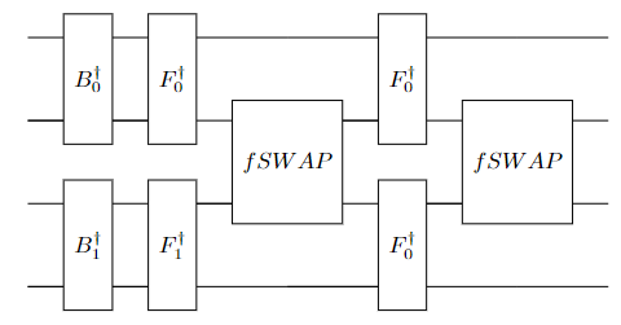

In [10]:

#XY4: The quantum circuit that diagonalize the XY model for 4 qbits.

#Function XY4:  creates the circuit that diagonalize the XY model for 4 qbits

#Parameters: 
        # nq -->  Qbits number of the circuit
        # n --> number of points used in the fourier transform.
        # J,g,l --> physical parameters of XY model. J is the exchange interaction parameter, g is the anisotropy parameter and 
        # l is the constant coupling with the magnetic field.
        
#outputs: 
        # qc --> Returns the XY4 circuit
def XY4(nq,n,J,g,l):
    #The gates are complex transpose because we want the inverse to our circuit
    #Bogoulibov gates:Bk(q0,q1,k,n,J,g,l):
    #Bogoliuvob gate for k=0, which affect the k=0 and k=2 states
    B0trans=Bk(nq,0,1,0,n,J,g,l).invert()
    #Bogoliuvob gate for k=1, which affect the k=1 and k=-1 states
    B1trans=Bk(nq,2,3,1,n,J,g,l).invert()
    #Fourier transform: fFT(q0,q1,k,n)
    #Fourier transform for k=0 in Qbits 0 and 1:
    F0transq01=fFT(nq,0,1,0,n).invert()
    #Fourier transform for k=0 in Qbits 2 and 3:
    F0transq23=fFT(nq,2,3,0,n).invert()
    #Fourier transform for k=1 in Qbits 2 and 3:
    F1trans=fFT(nq,2,3,1,n).invert()
    #fermionicSwap: fSWAP(q0,q1)
    fswapq12=fSWAP(nq,1,2)
    #total circuit
    qc=B0trans+B1trans+F0transq01+F1trans+fswapq12+F0transq01+F0transq23+fswapq12
    return qc




## Magnetization study:
In this chapter, we will evaluate the circuit's performance by calculating the ground state's total magnetization $\langle M_{z} \rangle$. The study will be conducted by varying the parameter $\lambda$, with fixed values of $\gamma=1$ and $J=1$. 


The ground states $\ket{gs}$ are:

$$\ket{gs}=
\begin{cases}
  \ket{1,0,1,1}, & \lambda \leq 0, \\
  \ket{1,1,1,1}, & \lambda \geq 0. 
\end{cases}$$


In [11]:
#Circuit to prepare the different ground states:

# Function vect1011: 
    #Function that creates a circuit which converts the |0000> to |1011>

#inputs:
    #nq --> number of Qbits in our circuit 
    
#outputs: 
    #qc --> returns a circuit where the |0000> become |1011>
    
def vect1011(nq):
    #initialize the circuit with nq qbits
    qc=models.Circuit(nq)
    #apply the X gates in 0,2,and 3
    qc.add((gates.X(0),gates.X(2),gates.X(3)))
    #return the final circit
    return qc


#_______________________________________________________________________________________________________________________________

# Function vect1111: 
    #Function that creates a circuit which converts the |0000> to |1111>

#inputs:
    #nq --> number of Qbits in our circuit 
    
#outputs: 
    #qc --> returns a circuit where the |0000> become |1111>
    
def vect1111(nq):
    #initialize the circuit with nq qbits
    qc=models.Circuit(nq)
    #apply the X gates to all qbits
    qc.add((gates.X(0),gates.X(1),gates.X(2),gates.X(3)))
    return qc


#_______________________________________________________________________________________________________________________________

# Function initvect: 
    #Function which define the first vector depending on lambda
    #if lambda <= 1. start with the vector(1011)
    #if lambda>1 start with the vector (1111).

#inputs:
    #nq --> number of Qbits in our circuit 
    #l --> physical parameter lambda
    
#outputs: 
    #initcirc --> returns the vect1111 circuit or vect1011 circuit


def initvect(nq,l):
    # if lambda <= 1. start with the vector(1011)
    if (l<=1.):
        initcirc=vect1011(nq)
    # if lambda>1 start with the vector (1111)
    if (l>1.):
        initcirc=vect1111(nq)
    return initcirc
    
    

In [12]:
#aixo borrar despres de energy:
def ExpectZi(zi,frec):
    # get the keys from the dict frec. This corresponds to a list with all the measured states 
    key=frec.keys()
    # get the values from the dict frec. This corresponds a list with the frequency of each state
    value=list(frec.values())
    #times that zi is in state 0 or 1
    N0=0
    N1=0
    #count, will be used to match the key state with the frec. value
    count=0
    #get all the different states and check the qbit where we are interested
    for i in key:
        #if the qbit is in the 0 state sum the freq. to N0 
        if int(i[zi])==0:
            N0+=value[count]
        #if not the state will be 1.Then sum the freq. to N1
        if int(i[zi])==1:
            N1+=value[count]
        #sum one to count
        count+=1
    Ntot=float(N0+N1)
    #calculate and return the expected value for sigmaz_i
    Mi=(N0-N1)/Ntot
    return Mi

### Quantum simulation:

The XY model simulation:

In [13]:
#set the fixed parameters
nq=4
J=1.
g=1.
n=4
#set all the possible lambdas
lambdasexp=np.arange(0,2.1,0.1)
#empty list to add the computet values for M an error M
Mlist=[]
errorlist=[]
#number of times the experiment is run
shots=10000

#calculate for different lambdas:
for l in lambdasexp:
    #circuit to set the initial vector
    iniqc=initvect(nq,l)
    #XYmodel circuit:
    qcXY4=XY4(nq,n,J,g,l)
    #add measures:
    qcXY4.add(gates.M(0,1,2,3))
    #execute the XY circuit with the wanted initial state and get the dictionary with the results
    result=qcXY4(initial_state=iniqc,nshots=shots)
    frec=result.frequencies(binary=True)
    #calculate the total magnetization
    M=Magnetization(nq,frec)
    #calculate the aleatory error
    error=errorM(nq,frec,M)
    Mlist.append(M)
    errorlist.append(error)



    
    
    

[Qibo 0.1.12.dev0|INFO|2023-06-07 16:55:54]: Using numpy backend on /CPU:0


### Analytical magnetization:


The analytical values fot the ground state's total magnetization $\langle M_{z} \rangle$ are:

$$\bra{gs}M_{z}\ket{gs}=
\begin{cases}
 - \frac{\lambda}{2\sqrt{1+\lambda^{2}}}, &\lambda \leq 0, \\
  -\frac{1}{2}-\frac{\lambda}{2\sqrt{1+\lambda^{2}}}, &\lambda \geq 0. 
\end{cases}$$

In [14]:
# Function Manalit: 
    #Compute the analytical value of M

#inputs:
    #l --> physical parameter lambda
    
#outputs: 
    #M --> returns the analytical magnetization

#define function to calculate analytically the magnetization for 4Qbits
def Manalit(l):
    if (l<=1.):
        M=l/(2*np.sqrt(1+l*l))
    if (l>1.):
        M=(l/(2*np.sqrt(1+l*l)))+1./2.
    return M

In [15]:
#total lambdas 
lambdas=np.arange(0,2.02,0.02)
#two parts because there is a discontinuity.
#With the objective to make more easy the plot we have separated the Manal results in two
Manal1=[]
Manal2=[]
lambdas1=[]
lambdas2=[]
#run for all lambdas 
for l in lambdas:
    if (l<=1.):
        #compute the analytical result
        Mag=Manalit(l)
        #append to the first list
        Manal1.append(Mag)
        lambdas1.append(l)
    if(l>1.):
        #compute the analytical result
        Mag=Manalit(l)
        #append to the second list
        Manal2.append(Mag)
        lambdas2.append(l)



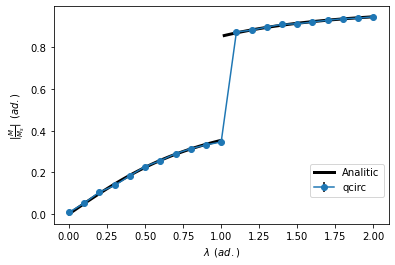

In [16]:
import matplotlib.pyplot as plt
# Create the figure and axis
fig, ax = plt.subplots()
# absolute value for Magnetization
Mlist=np.absolute(Mlist)
#plot the analytical values
plt.plot(lambdas1, Manal1,'black',linewidth=3,label='Analitic')
plt.plot(lambdas2, Manal2,'black',linewidth=3)
#plot the quantum simulation results with aleatory error
plt.errorbar(lambdasexp, Mlist, yerr=errorlist,label="qcirc", ecolor='black',marker='o')
plt.xlabel(r"$\lambda \:\: (ad.)$")
plt.ylabel(r"$ |\frac{M}{M_{s}}| \:\: (ad.)$")
plt.legend(bbox_to_anchor=(1, 0.3))
# save the plot
plt.savefig('Magnetitzation_TFG_fin.png')
# show the plot
plt.show()